In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import datetime

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [2]:
df = pd.read_csv('./data/bitcoin_eda.csv', index_col=0)
df.head()

date  close   volume  fluctuation  weighted_close  close_log  \
0  2013-01-01   13.3  28410.0        -1.55        377853.0   2.587764   
1  2013-01-02   13.3  17970.0         0.00        239001.0   2.587764   
2  2013-01-03   13.4  18030.0         0.90        241602.0   2.595255   
3  2013-01-04   13.5  29640.0         0.75        400140.0   2.602690   
4  2013-01-05   13.4  21330.0        -0.44        285822.0   2.595255   

   close_norm  volume_norm  weighted_close_norm  
0    0.000000     0.028034         0.000000e+00  
1    0.000000     0.017585         0.000000e+00  
2    0.000002     0.017645         3.073006e-08  
3    0.000003     0.029265         1.019338e-07  
4    0.000002     0.020948         3.648214e-08

In [13]:
df.date = pd.to_datetime(df.date)
#df.set_index('date', inplace=True)
df.index = df.date
df['simple_ma'] = df.close.rolling(window=7).mean()
df['double_ma'] = df.simple_ma.rolling(window=7).mean()

In [14]:
df1 = pd.DataFrame({'ds':df.index, 'y':df.close})
df2 = pd.DataFrame({'ds':df.index, 'y':df.simple_ma})
df3 = pd.DataFrame({'ds':df.index, 'y':df.double_ma})

# Facebook Prophet

changepoints
- Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. It then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization) - this essentially means that Prophet has a large number of possible places where the rate can change, but will use as few of them as possible.
- By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series

In [5]:
def get_forecasts(model, data):
    prophet = model
    prophet.fit(data)
    return [prophet.predict(prophet.make_future_dataframe(periods=p))
            for p in [365//2, 365, 365*2, 365*3]]

def draw_forecasts(forecast_li):
    f = plt.figure(figsize=(16,8))
    for i, fc in enumerate(forecast_li):
        ax_ = f.add_subplot(221+i)
        prophet.plot(fc, ax=ax_)
        add_changepoints_to_plot(ax_, prophet, fc)

# df.close (linear)
2013.01.01 - 2021.02.28

### changepoint_prior_scale = default

In [157]:
# instantiate the model and fit the timeseries
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=1.0)

forecasts = get_forecasts(prophet, df1)

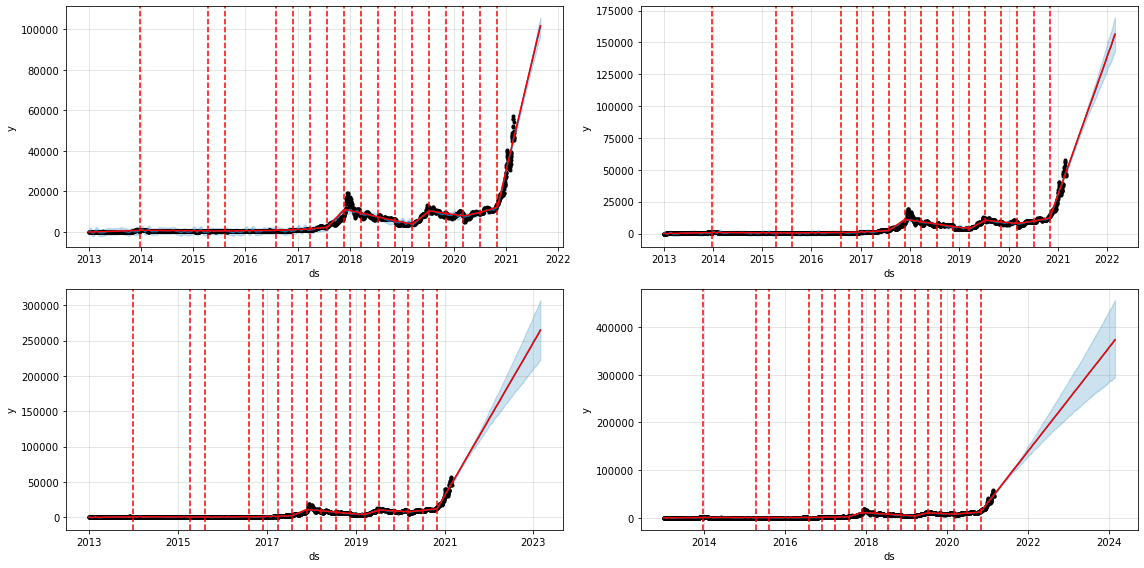

In [158]:
draw_forecasts(forecasts)

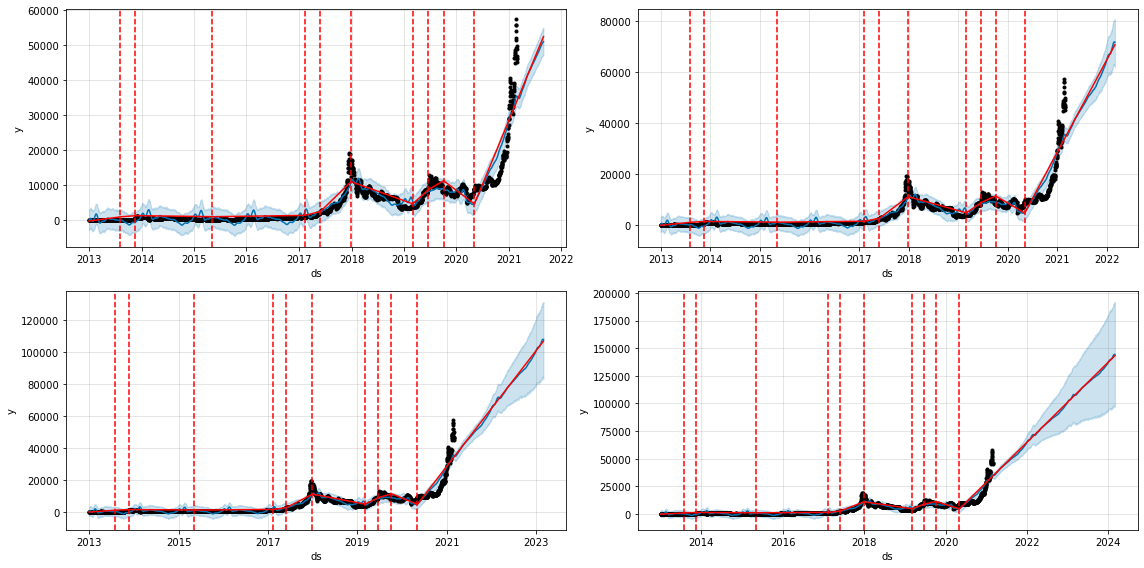

In [161]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=0.9)

draw_forecasts(get_forecasts(prophet, df1))

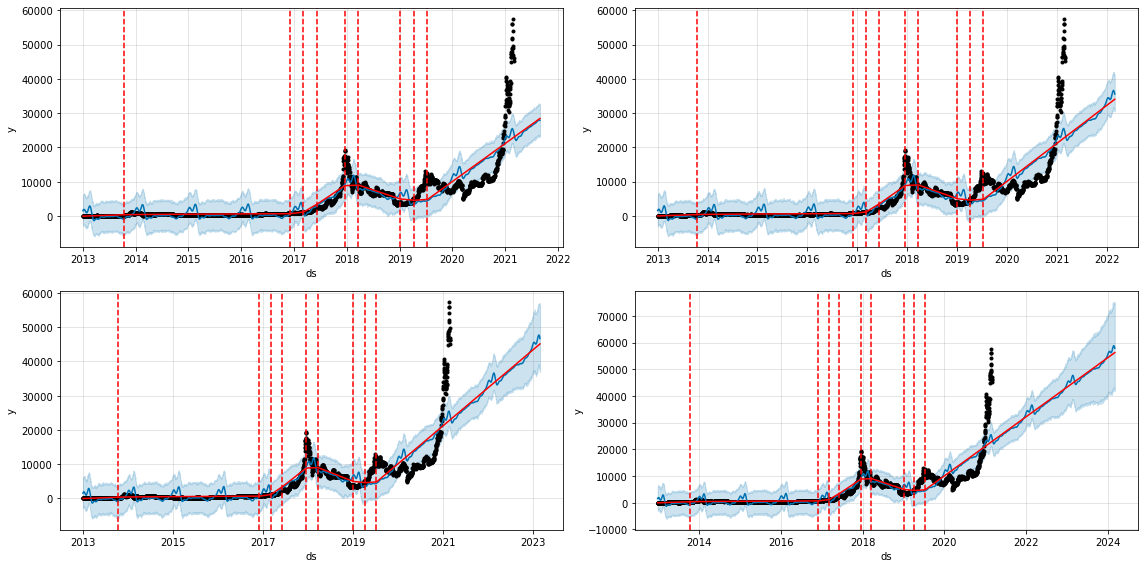

In [162]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=0.8)

draw_forecasts(get_forecasts(prophet, df1))

### changepoint_prior_scale=30

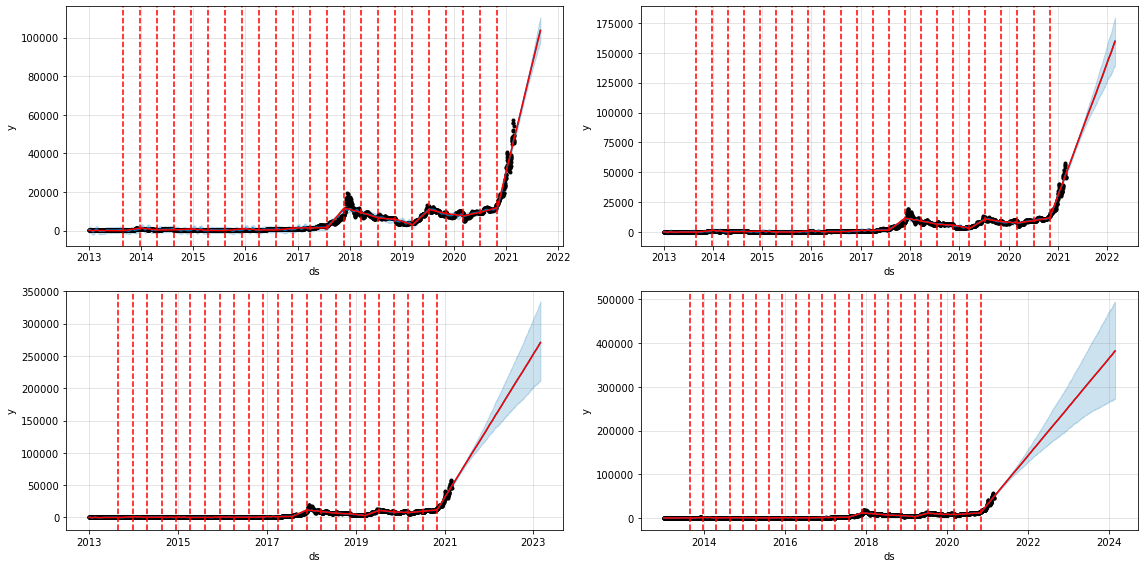

In [165]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=1.0,
                 changepoint_prior_scale=30)

draw_forecasts(get_forecasts(prophet, df1))

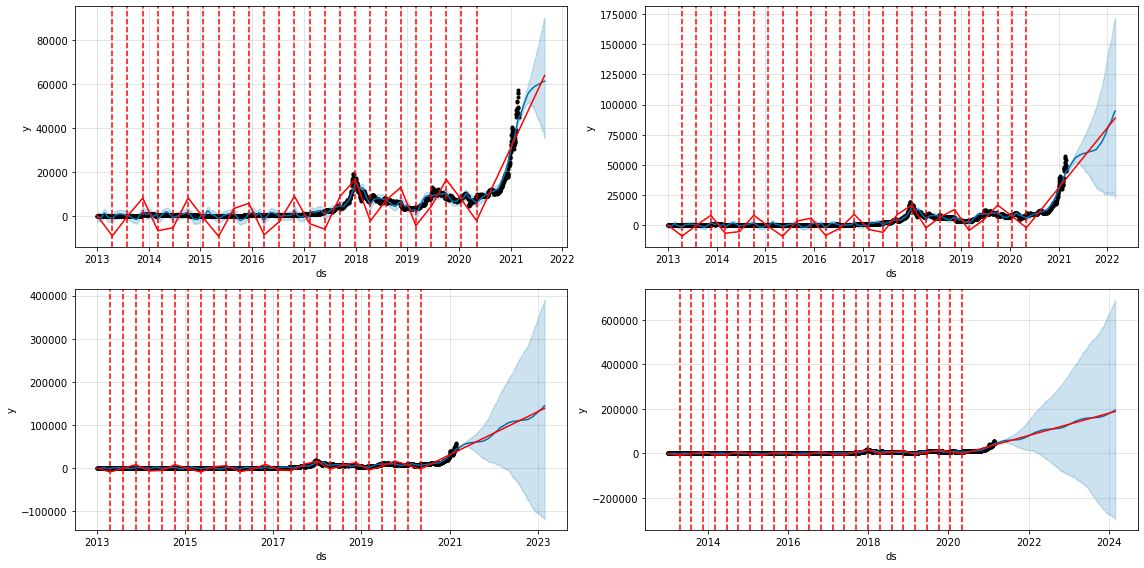

In [166]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=0.9,
                 changepoint_prior_scale=30)

draw_forecasts(get_forecasts(prophet, df1))

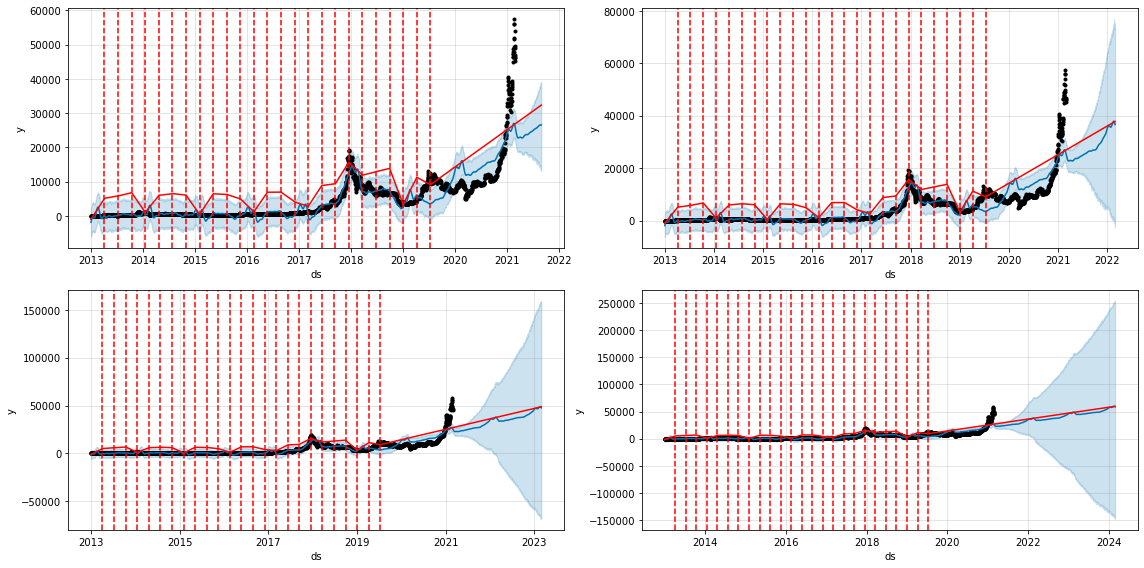

In [167]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=0.8,
                 changepoint_prior_scale=30)

draw_forecasts(get_forecasts(prophet, df1))

### changepoint_prior_scale = 100

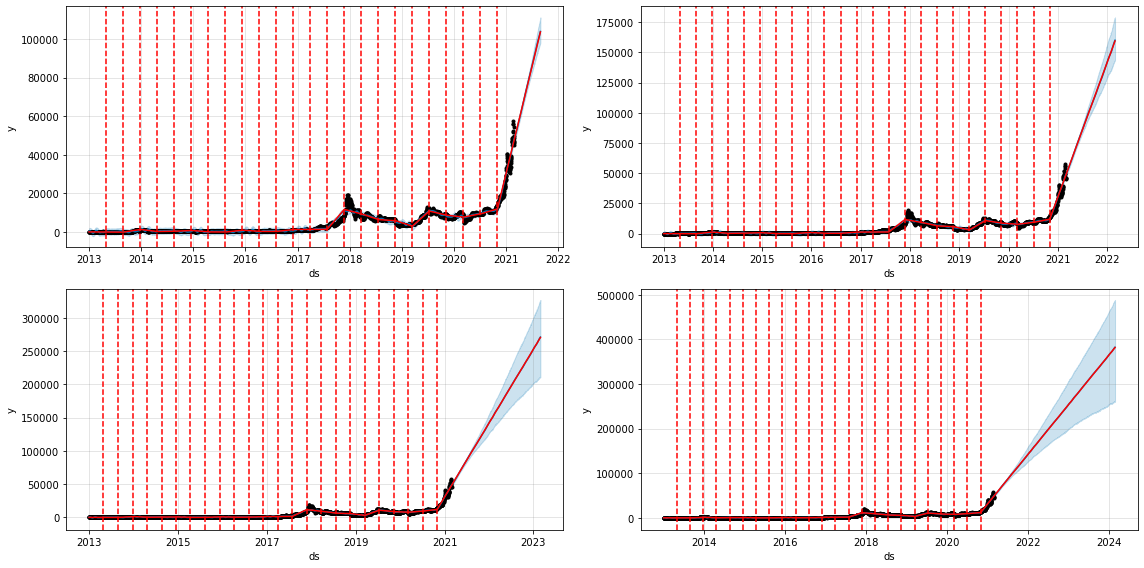

In [163]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=1.0,
                 changepoint_prior_scale=100)

draw_forecasts(get_forecasts(prophet, df1))

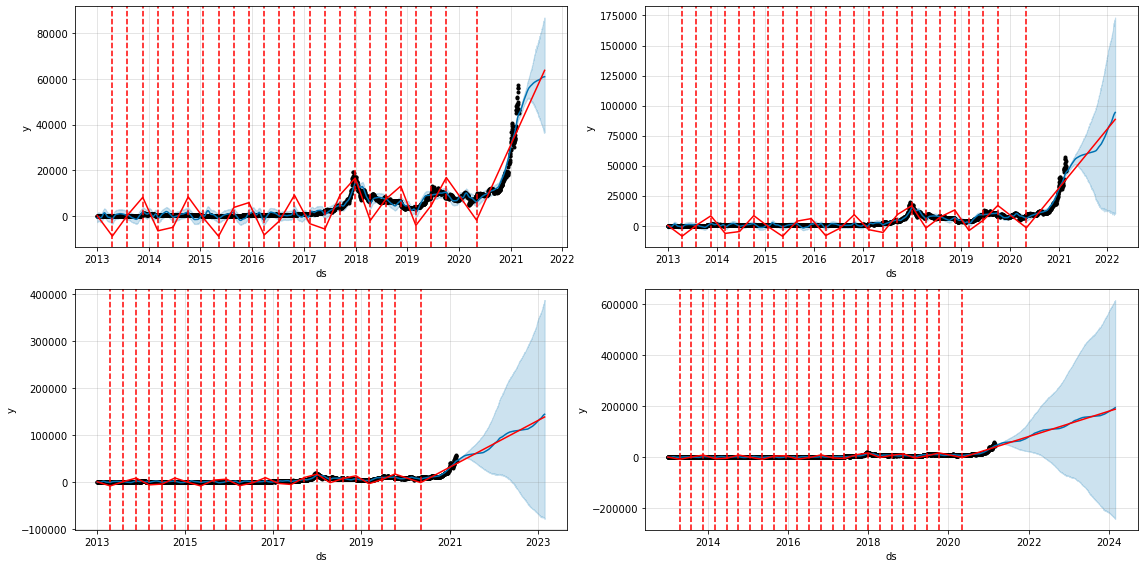

In [33]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=0.9,
                 changepoint_prior_scale=100)

draw_forecasts(get_forecasts(prophet, df1))

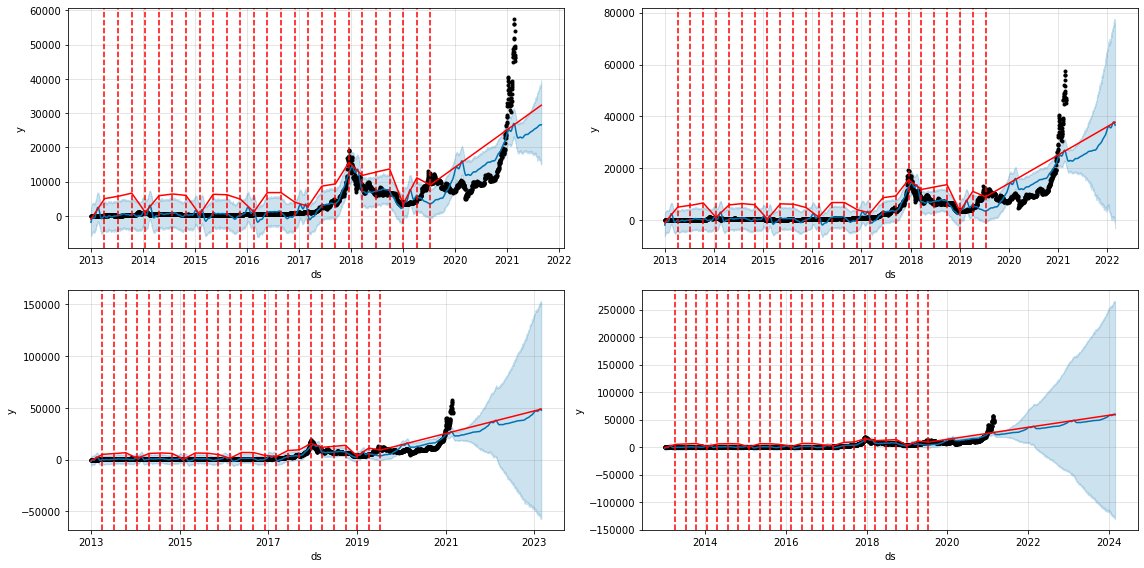

In [168]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=0.8,
                 changepoint_prior_scale=100)

draw_forecasts(get_forecasts(prophet, df1))

# df1, after 2017.01.01
- Bitcoin on track

In [169]:
df1_from_2017 = df1[(df1.index > '2016-12-31')]

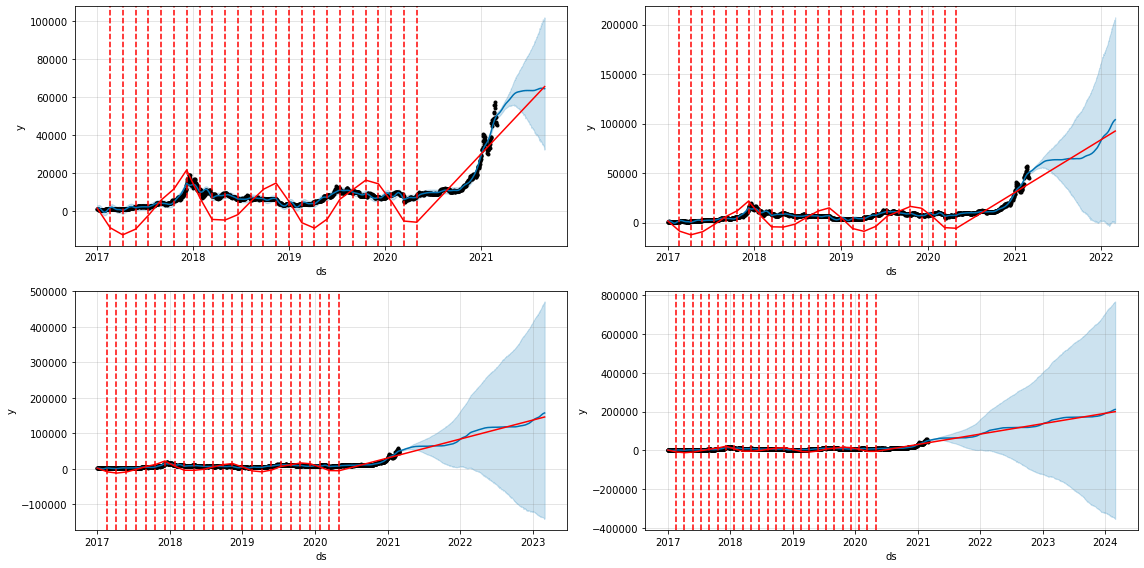

In [170]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=0.8,
                 changepoint_prior_scale=100)

draw_forecasts(get_forecasts(prophet, df1_from_2017))

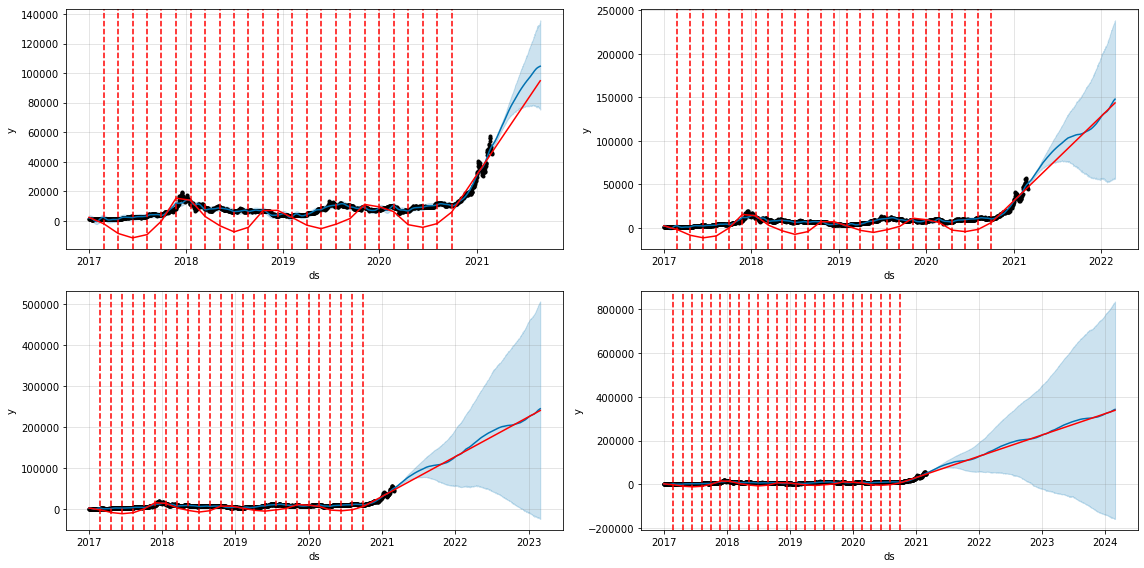

In [171]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=0.9,
                 changepoint_prior_scale=100)

draw_forecasts(get_forecasts(prophet, df1_from_2017))

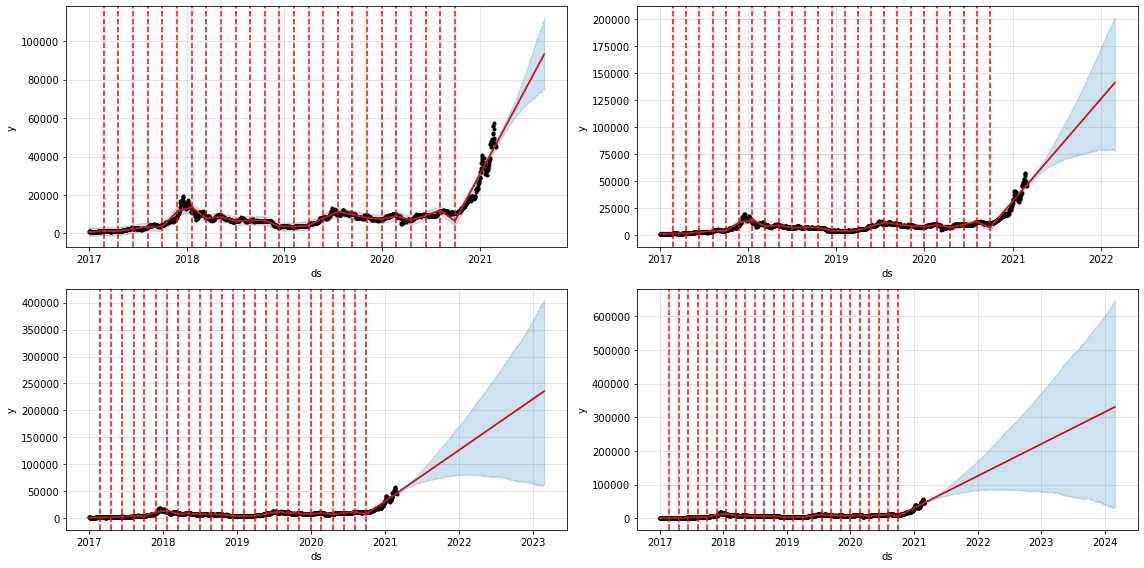

In [173]:
prophet = Prophet(growth='linear',
                 daily_seasonality=False,
                  weekly_seasonality=True,
                yearly_seasonality=False,
                 changepoint_range=0.9,
                 changepoint_prior_scale=100)

draw_forecasts(get_forecasts(prophet, df1_from_2017))

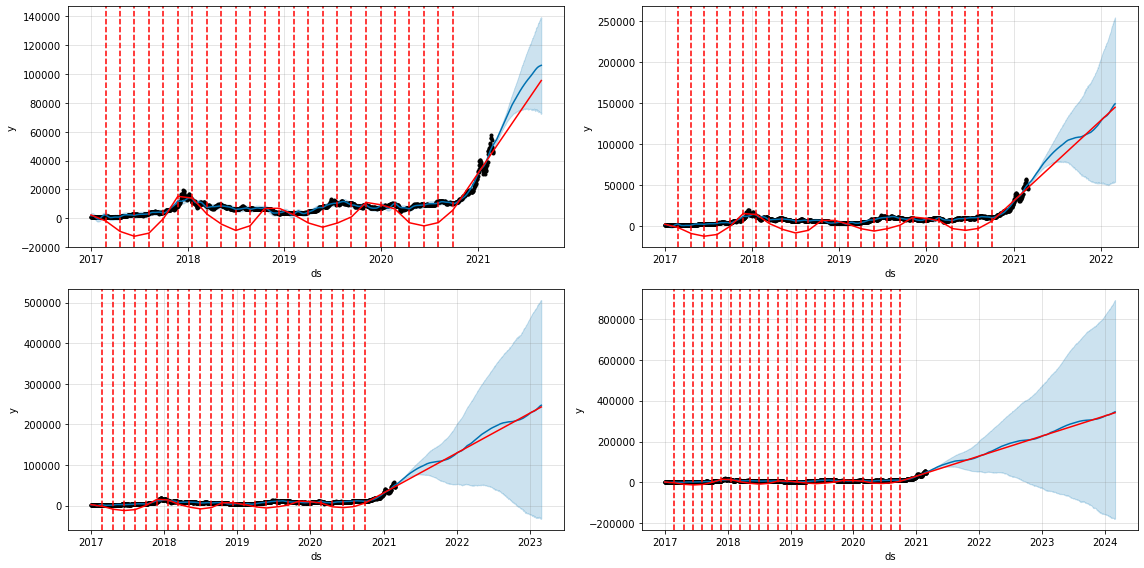

In [180]:
prophet = Prophet(growth='linear',
                  daily_seasonality=True,
#                   weekly_seasonality=False,
#                 yearly_seasonality=False,
                 changepoint_range=0.9,
                 changepoint_prior_scale=100,
                 seasonality_prior_scale=1000)

draw_forecasts(get_forecasts(prophet, df1_from_2017))

# after 2019.12.01
- corona outbreak

<AxesSubplot:xlabel='date'>

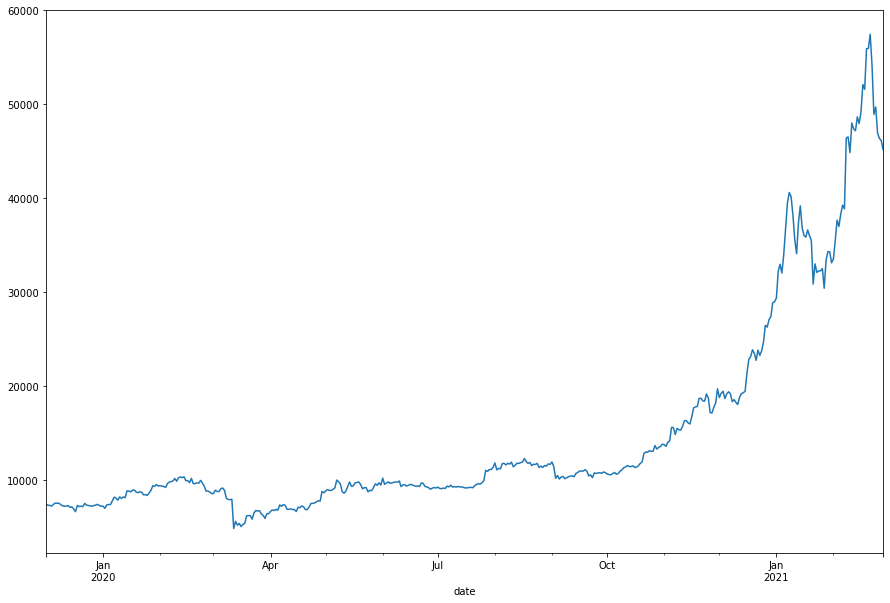

In [196]:
df1_after_corona = df1[(df1.index >= '2019-12-01')]
df1_after_corona['y'].plot(figsize=(15,10))

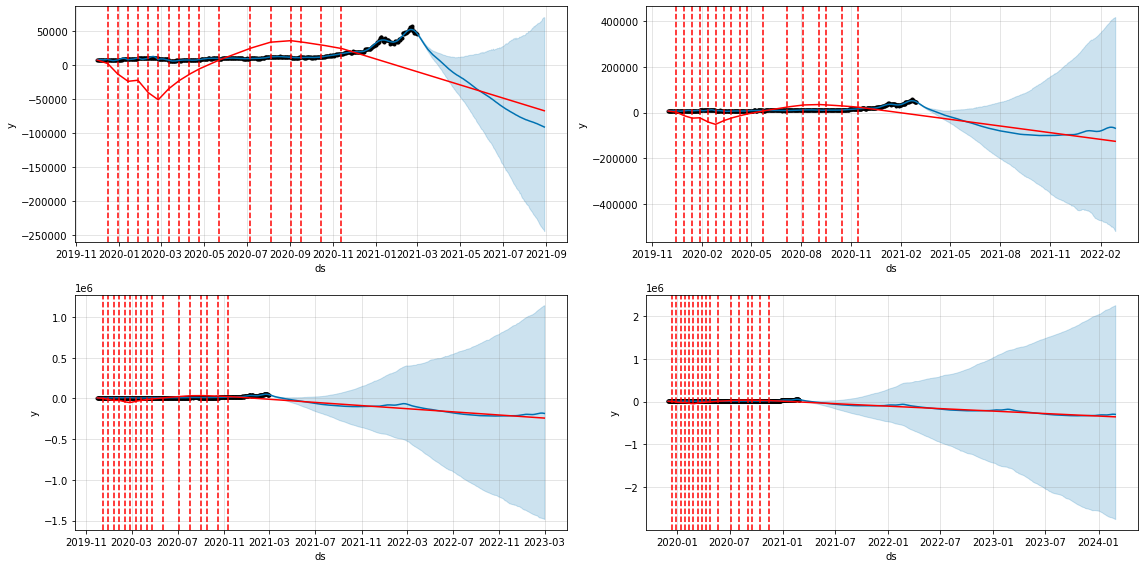

In [190]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.8,
                 changepoint_prior_scale=1)

draw_forecasts(get_forecasts(prophet, df1_after_corona))

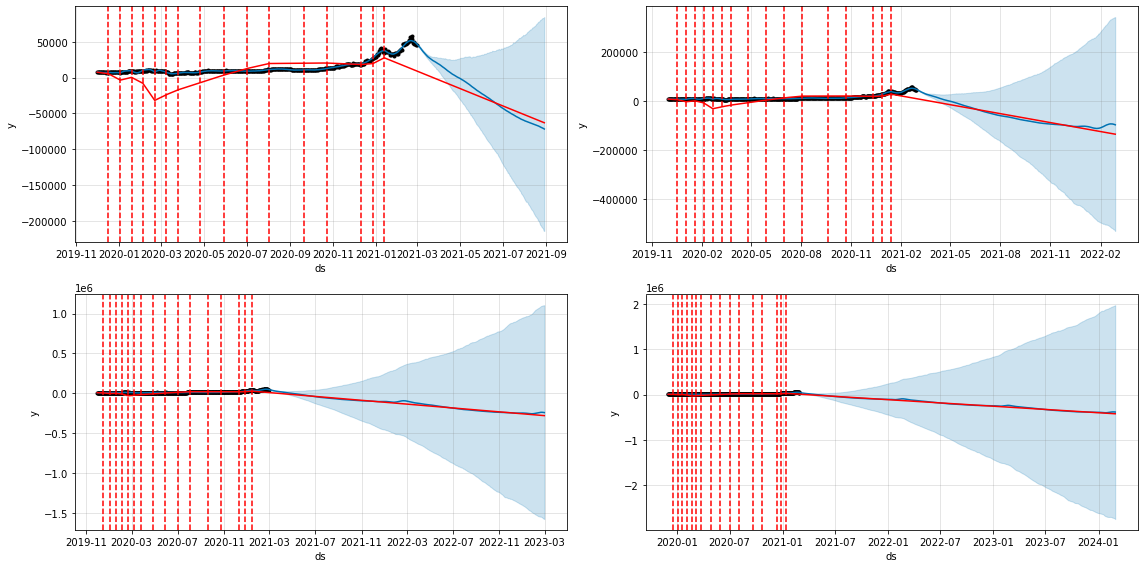

In [191]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.9,
                 changepoint_prior_scale=1)

draw_forecasts(get_forecasts(prophet, df1_after_corona))

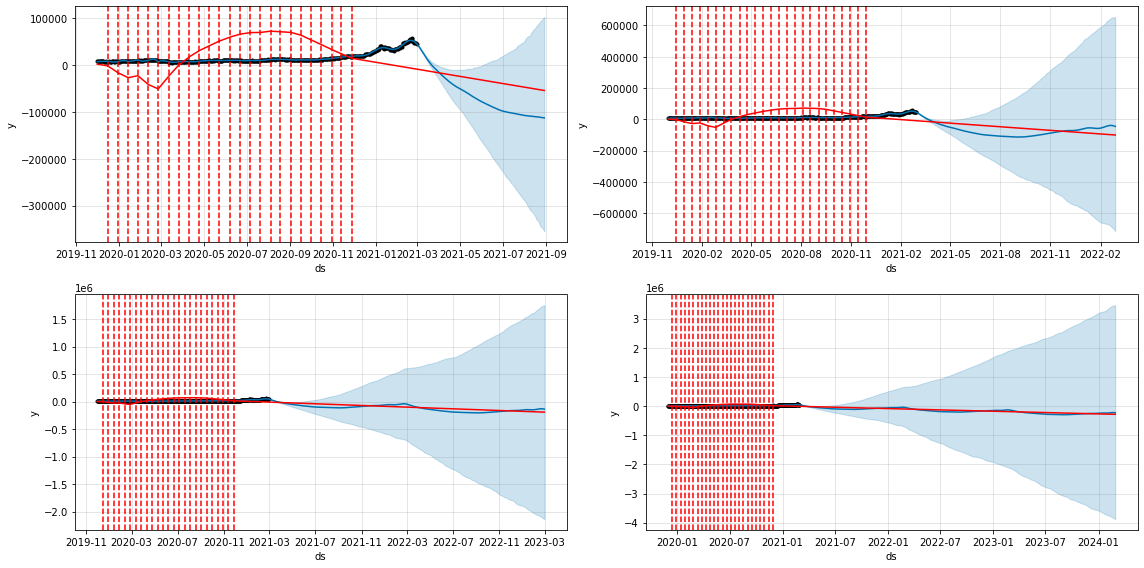

In [192]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.8,
                 changepoint_prior_scale=30)

draw_forecasts(get_forecasts(prophet, df1_after_corona))

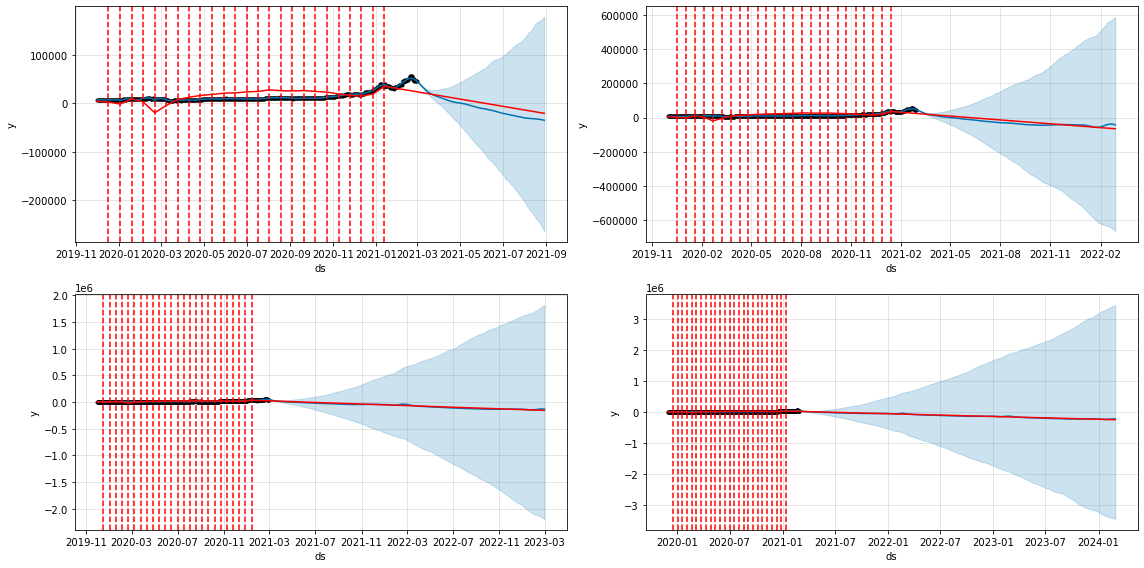

In [193]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.9,
                 changepoint_prior_scale=30)

draw_forecasts(get_forecasts(prophet, df1_after_corona))

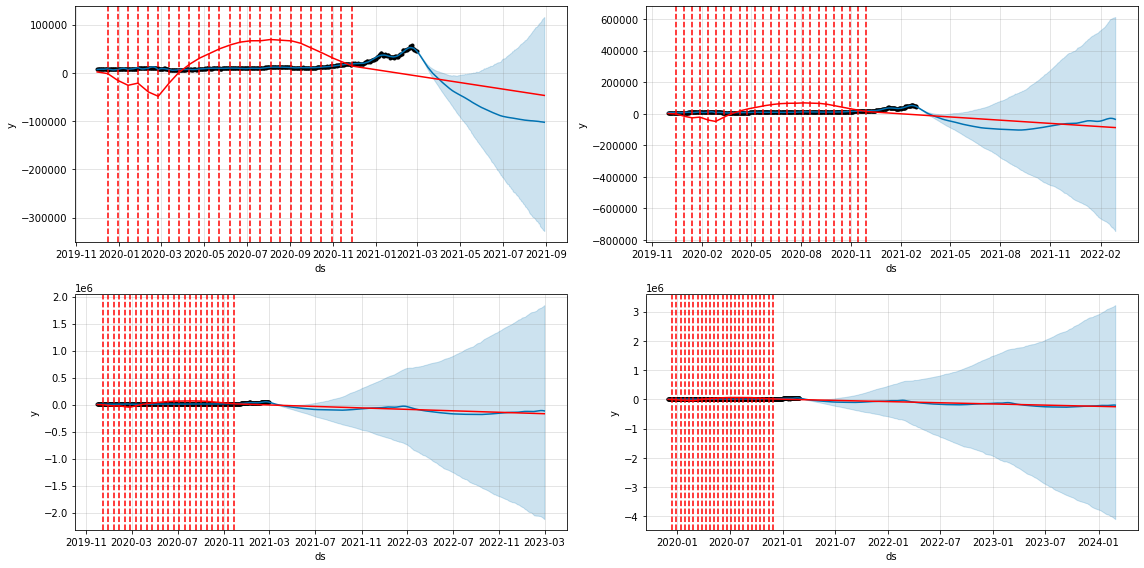

In [189]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.8,
                 changepoint_prior_scale=100)

draw_forecasts(get_forecasts(prophet, df1_after_corona))

# After 2020.11.07
- '조 바이든 대통령 당선인(president-elect)' 표현이 외신 기사에서 첫 등장
- 조 바이든의 대통령 당선 성명 발표일

<AxesSubplot:xlabel='date'>

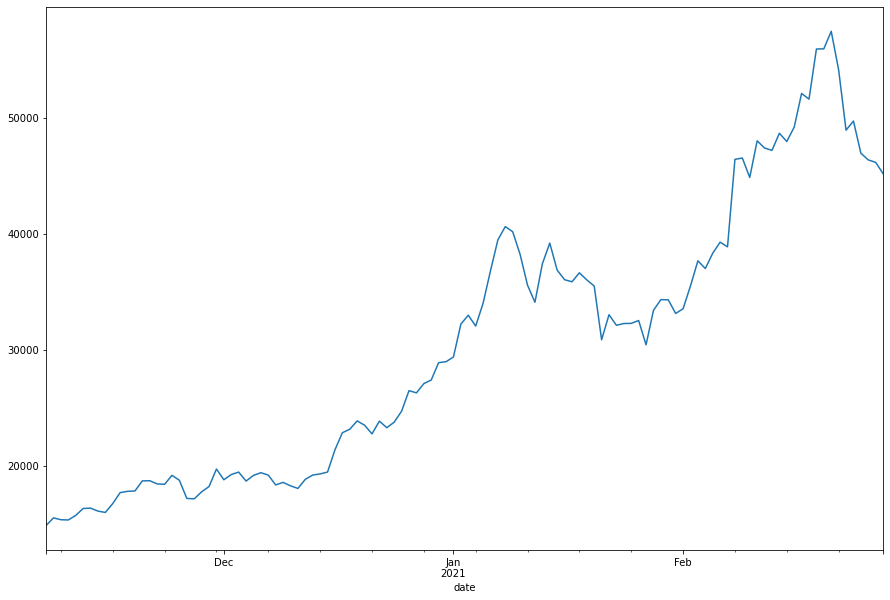

In [197]:
df1_after_biden = df1[(df1.index >= '2020-11-07')]
df1_after_biden['y'].plot(figsize=(15,10))

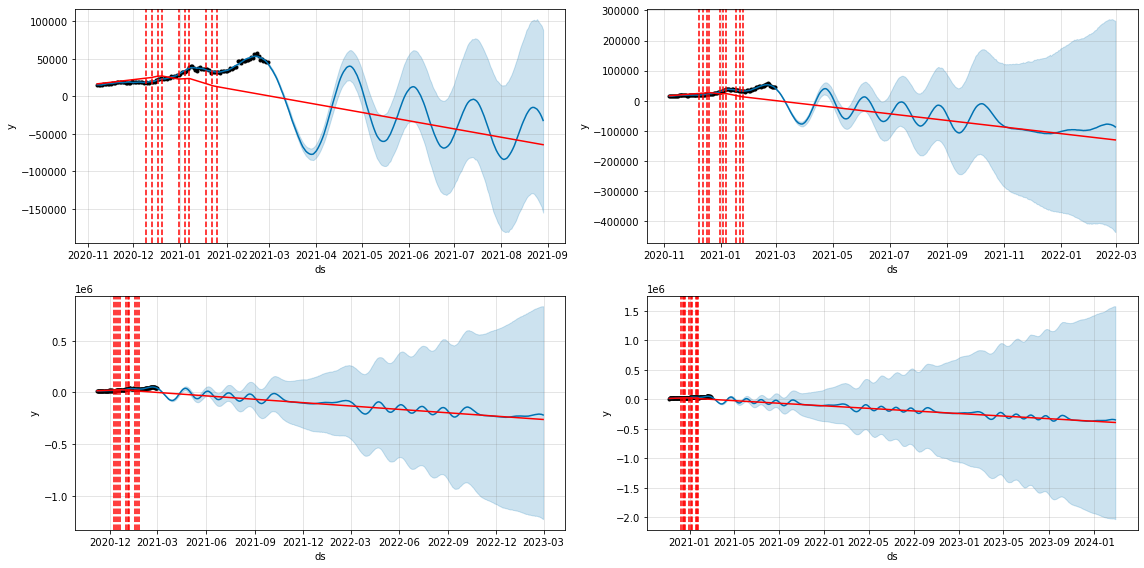

In [201]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.8,
                 changepoint_prior_scale=1)

draw_forecasts(get_forecasts(prophet, df1_after_biden))

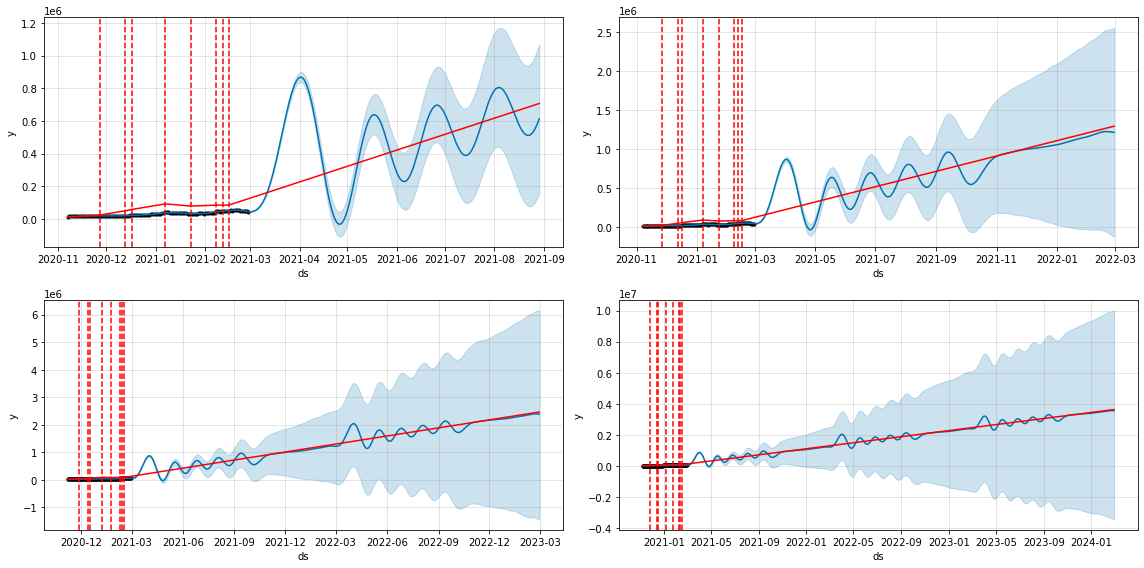

In [202]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.9,
                 changepoint_prior_scale=1)

draw_forecasts(get_forecasts(prophet, df1_after_biden))

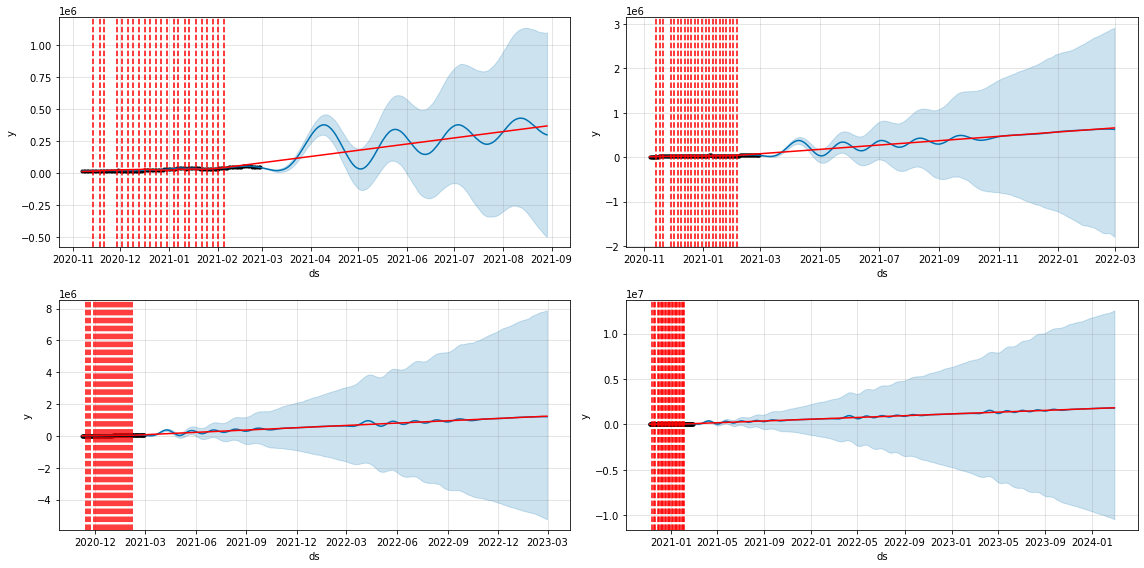

In [204]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.8,
                 changepoint_prior_scale=10)

draw_forecasts(get_forecasts(prophet, df1_after_biden))

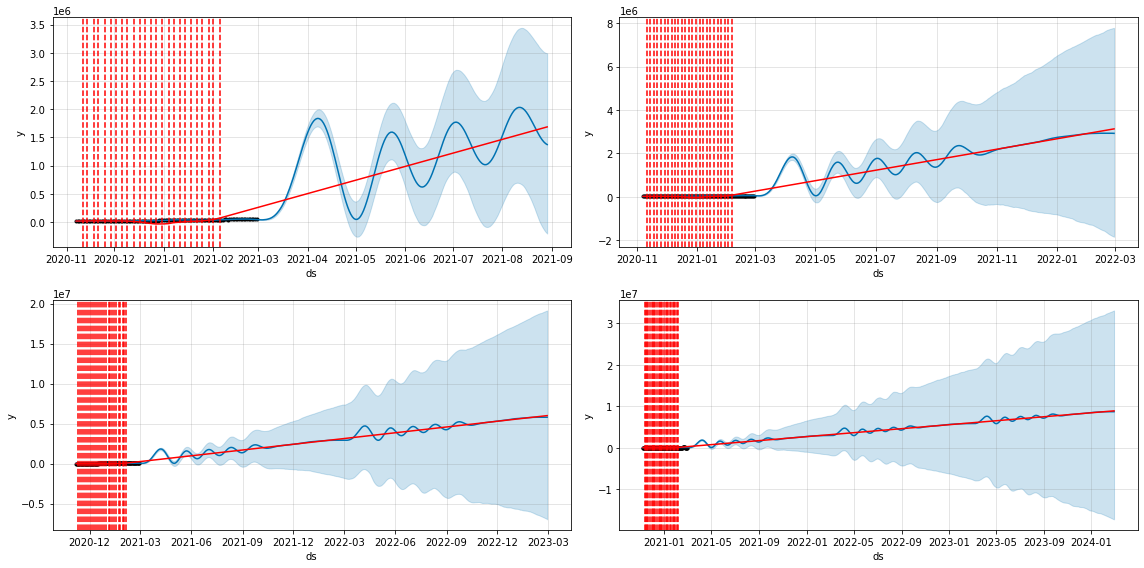

In [203]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.8,
                 changepoint_prior_scale=100)

draw_forecasts(get_forecasts(prophet, df1_after_biden))

# Seasonality, Holiday Effects, And Regressors
https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

# Blockchain Explorer
- https://www.blockchain.com/btc/unconfirmed-transactions
- https://app.intotheblock.com/coin/btc?pid=blockchain&utm_source=blockchain_widget

# Hyperparameter Tuning
https://facebook.github.io/prophet/docs/diagnostics.html#parallelizing-cross-validation

In [ ]:
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

### logistic

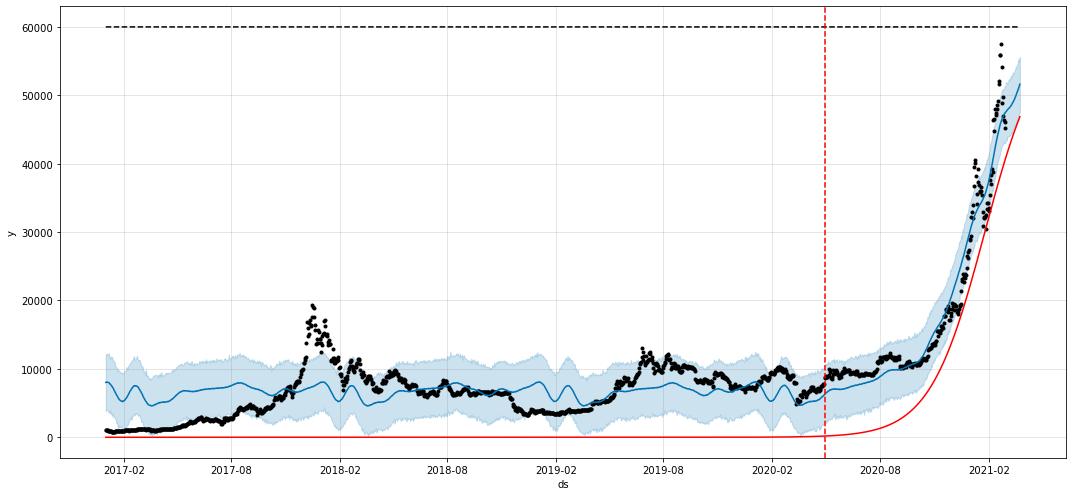

In [117]:
# instantiate the model and fit the timeseries
df1_from_2017_cap = df1_from_2017.copy()
df1_from_2017_cap['cap'] = 60000

prophet = Prophet(growth='logistic',
                 daily_seasonality=True)
prophet.fit(df1_from_2017_cap)

# create a future data frame 
future = prophet.make_future_dataframe(periods=25)
future['cap']=60000
forecast = prophet.predict(future)

fig = prophet.plot(forecast, figsize=(15,7))
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

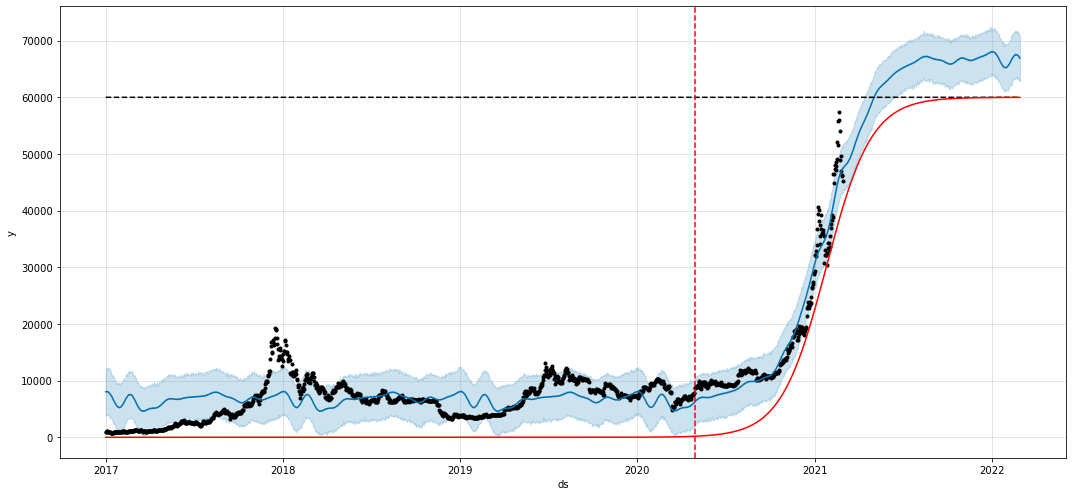

In [118]:
future = prophet.make_future_dataframe(periods=365)
future['cap']=60000
forecast = prophet.predict(future)

fig = prophet.plot(forecast, figsize=(15,7))
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

# df.rolling_weekly_avg

In [8]:
# instantiate the model and fit the timeseries
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=1.0)

forecasts = get_forecasts(prophet, df2)

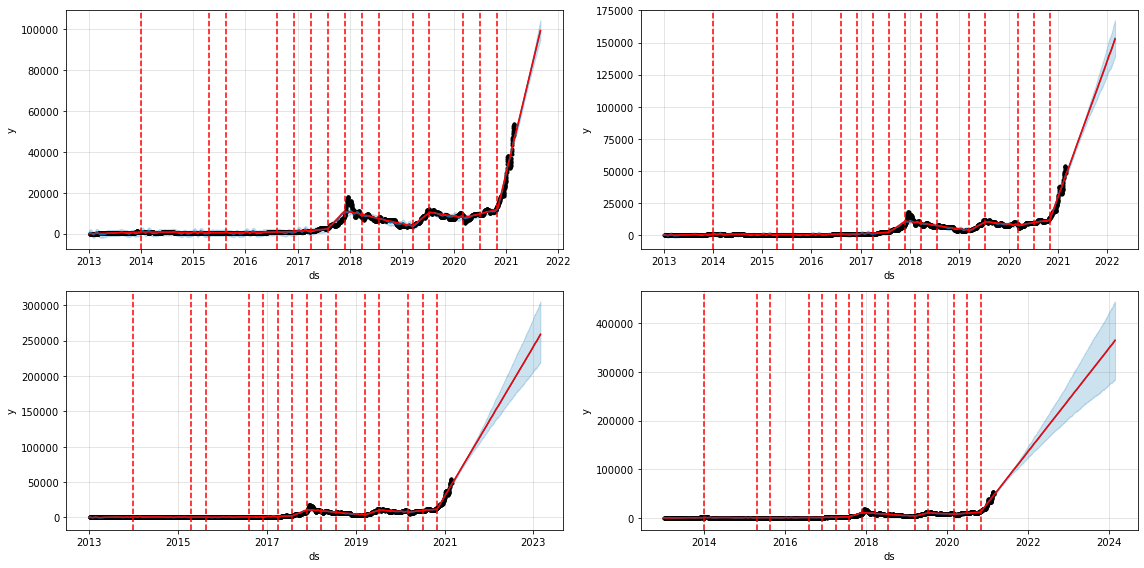

In [9]:
draw_forecasts(forecasts)

# df2 after corona outbreak

In [21]:
df2_after_corona = df2[(df2.index >= '2019-12-01')]

# df2, after 2020-11-07

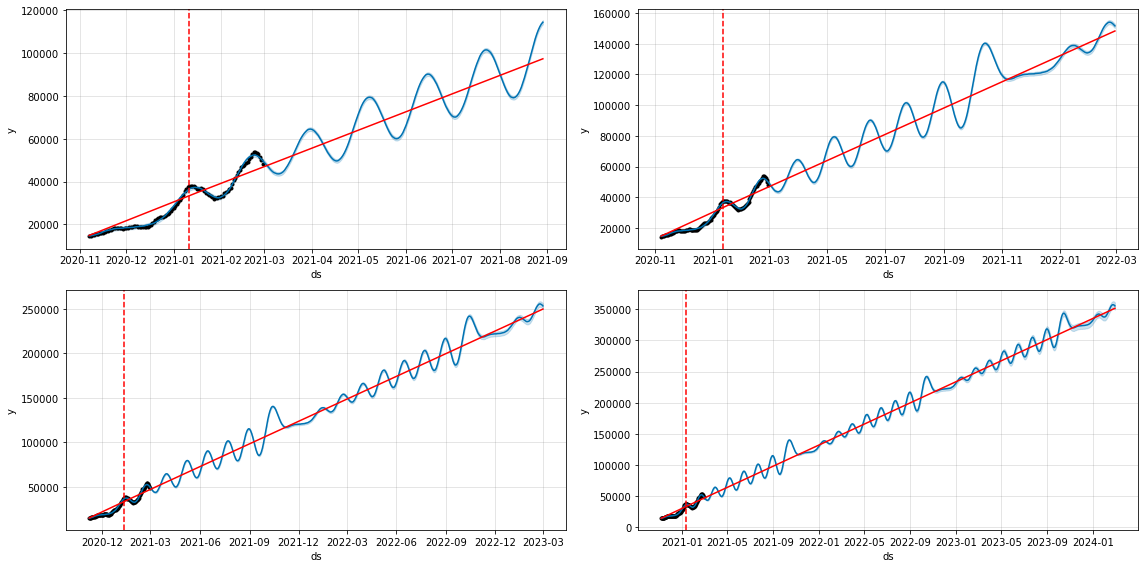

In [11]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.8)

draw_forecasts(get_forecasts(prophet, df2_after_biden))

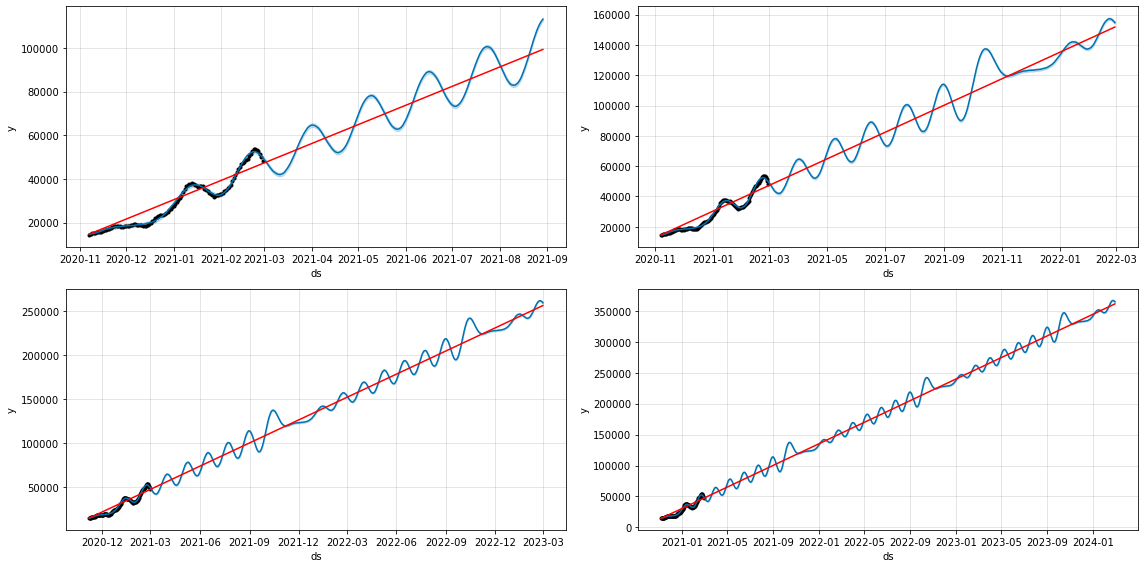

In [29]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.9)

draw_forecasts(get_forecasts(prophet, df2_after_biden))

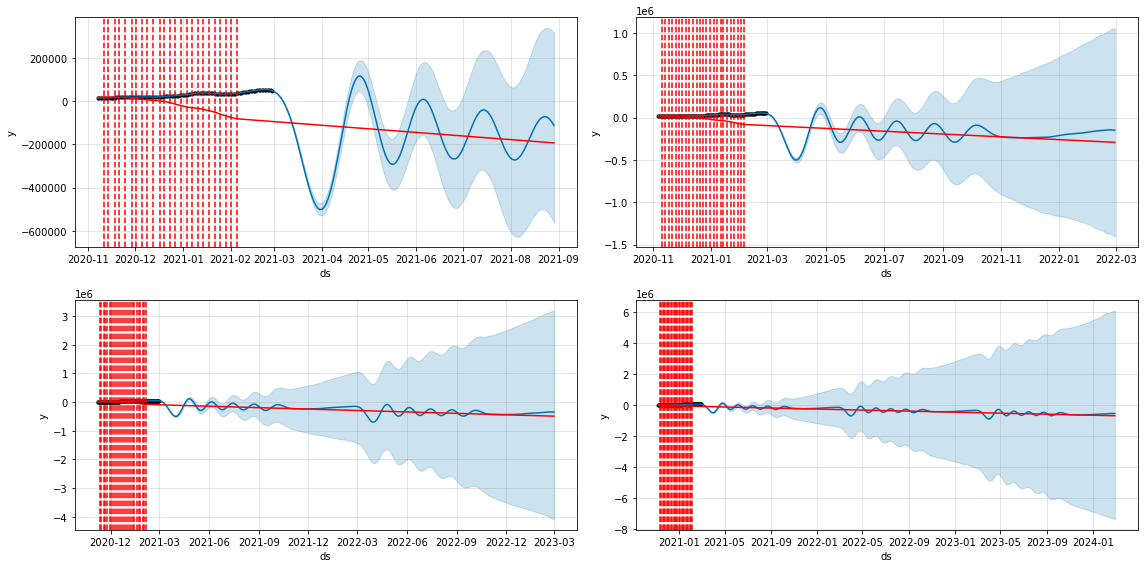

In [10]:
df2_after_biden = df2[df2.index >= '2020-11-07']

prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.8,
                 changepoint_prior_scale=100)

draw_forecasts(get_forecasts(prophet, df2_after_biden))

# df3

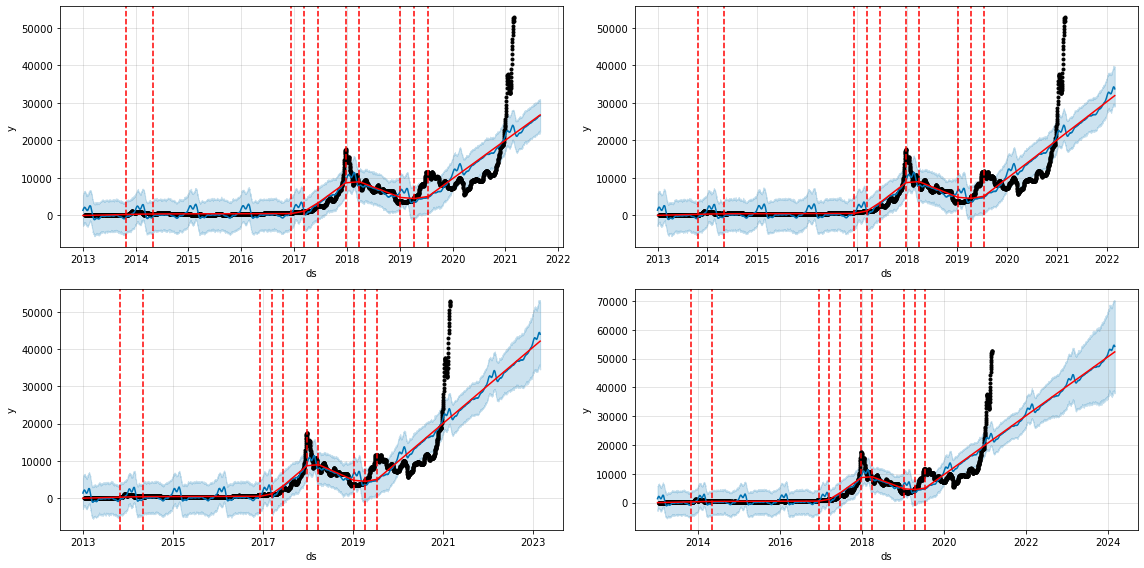

In [18]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.8)

draw_forecasts(get_forecasts(prophet, df3))

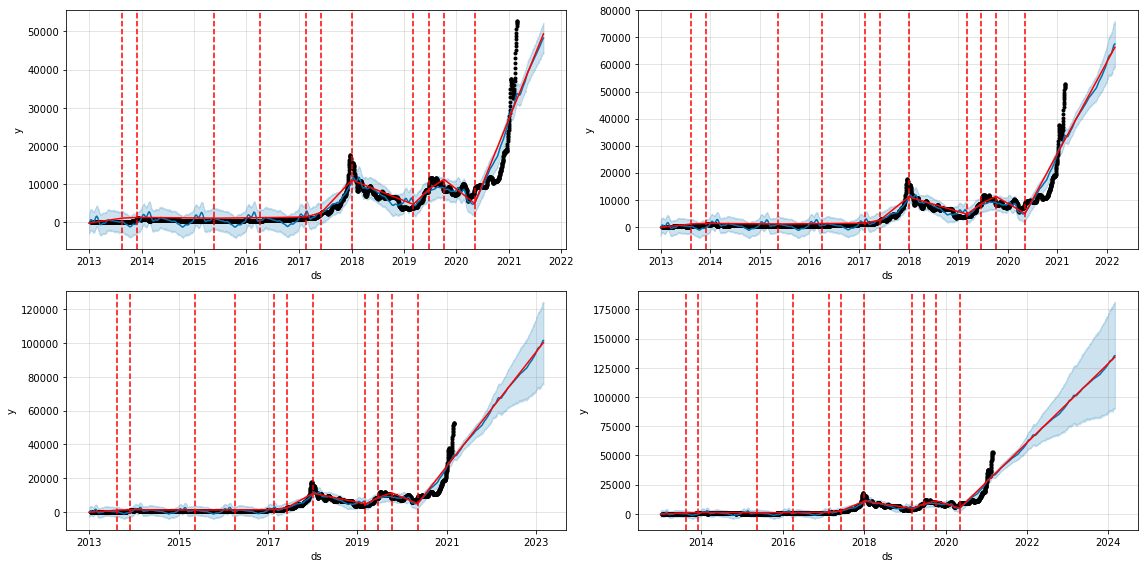

In [19]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.9)

draw_forecasts(get_forecasts(prophet, df3))

# df3 after corona outbreak


In [20]:
df3_after_corona = df3[(df3.index >= '2019-12-01')]

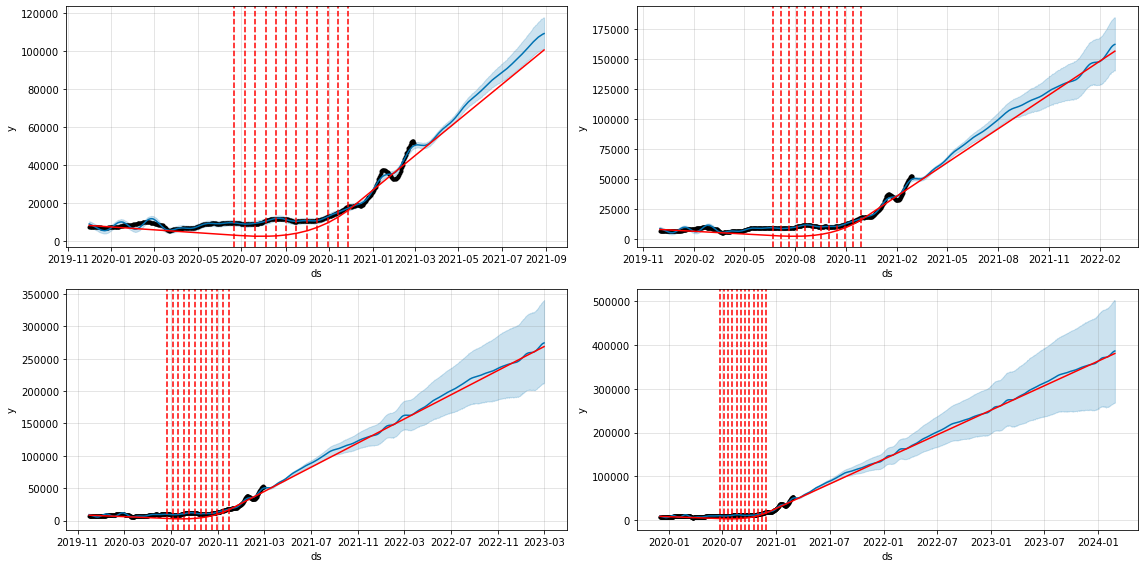

In [22]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 yearly_seasonality=True,
                 changepoint_range=0.8)

draw_forecasts(get_forecasts(prophet, df3_after_corona))

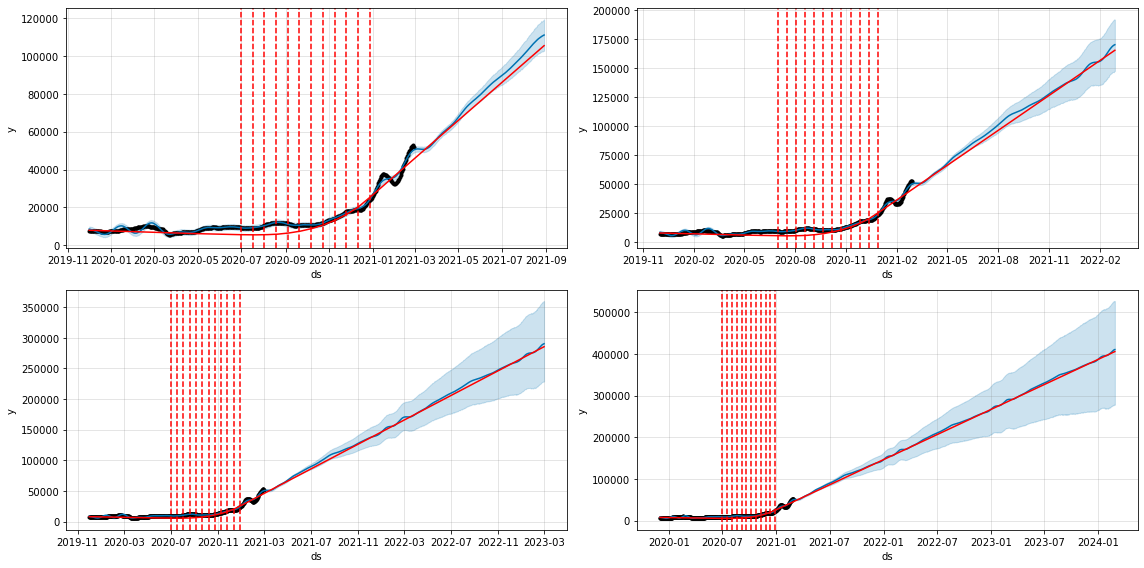

In [23]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 yearly_seasonality=True,
                 changepoint_range=0.9)

draw_forecasts(get_forecasts(prophet, df3_after_corona))

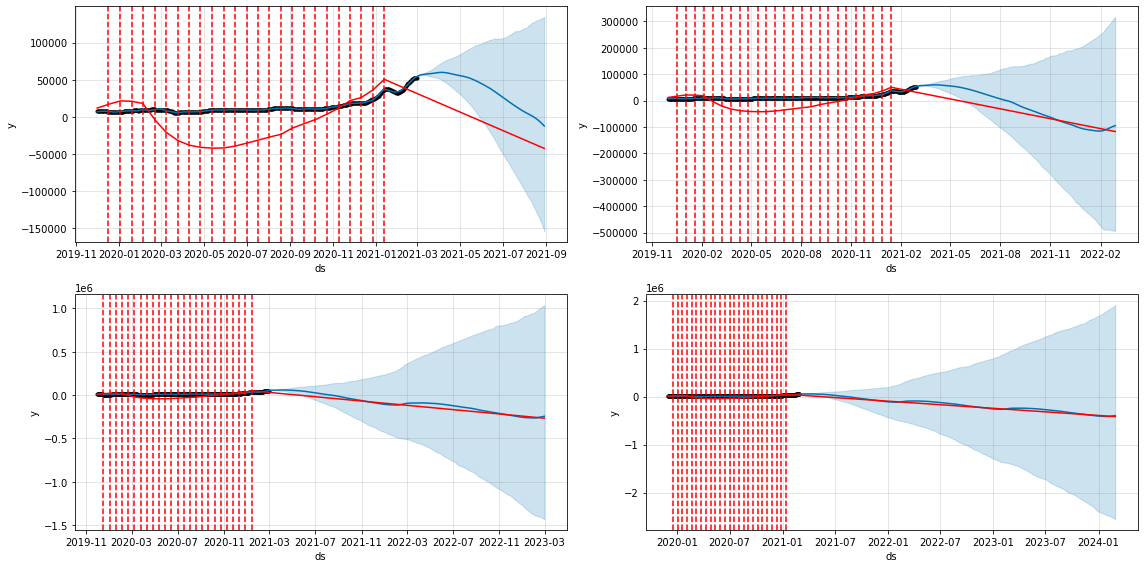

In [30]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 yearly_seasonality=True,
                 changepoint_range=0.9,
                 changepoint_prior_scale=10)

draw_forecasts(get_forecasts(prophet, df3_after_corona))

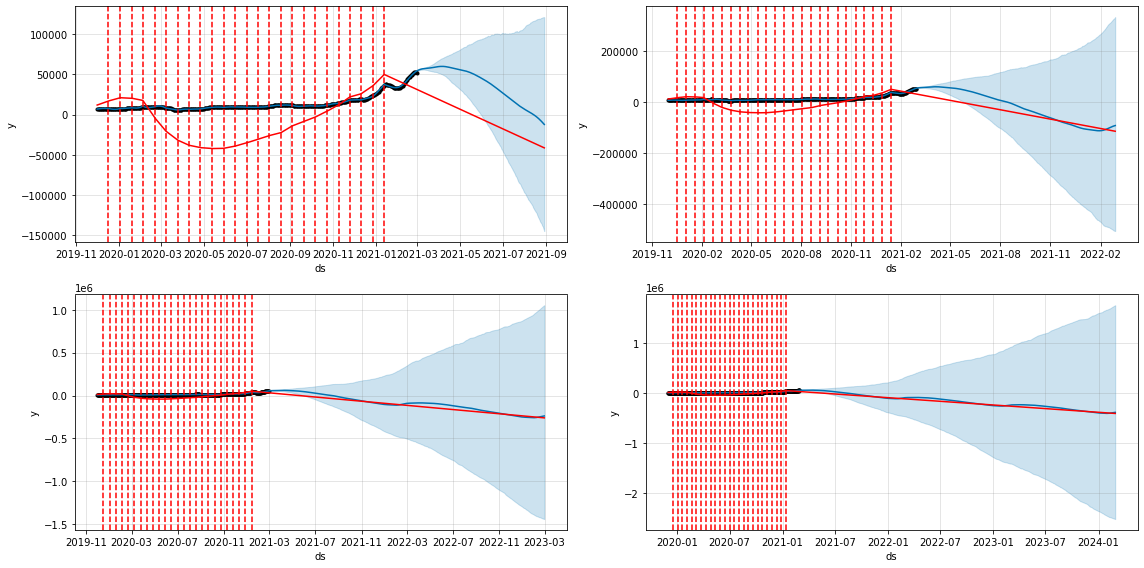

In [25]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 yearly_seasonality=True,
                 changepoint_range=0.9,
                 changepoint_prior_scale=30)

draw_forecasts(get_forecasts(prophet, df3_after_corona))

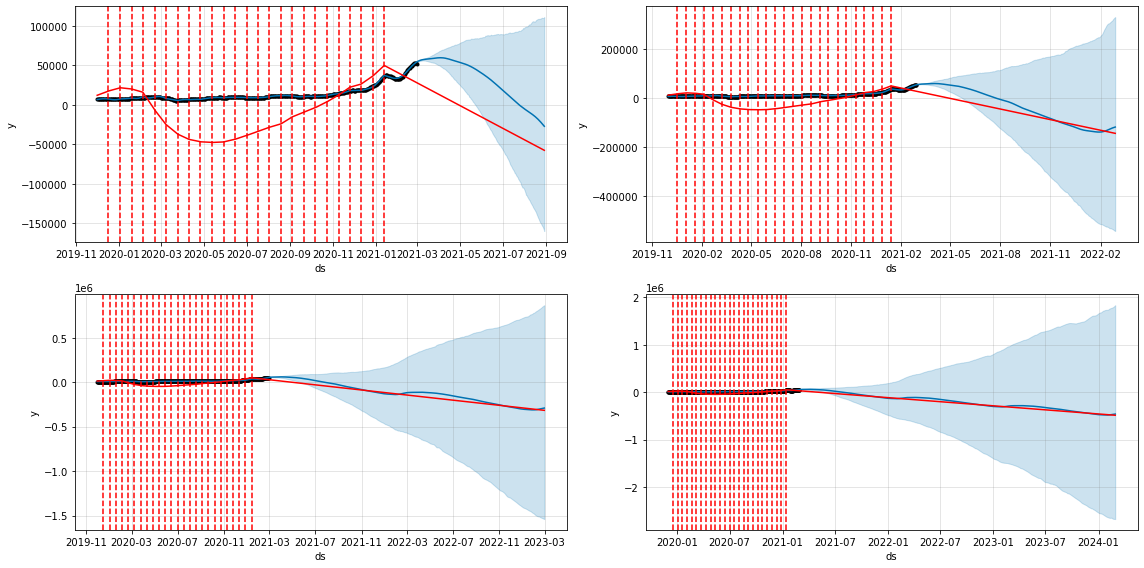

In [26]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 yearly_seasonality=True,
                 changepoint_range=0.9,
                 changepoint_prior_scale=100)

draw_forecasts(get_forecasts(prophet, df3_after_corona))

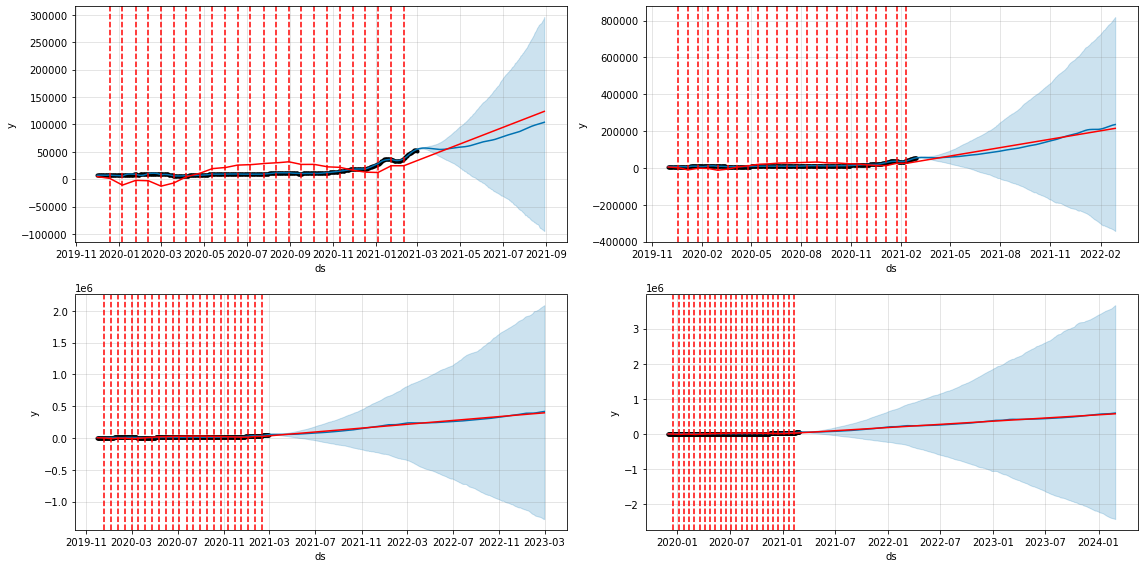

In [28]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 yearly_seasonality=True,
                 changepoint_range=1.0,
                 changepoint_prior_scale=100)

draw_forecasts(get_forecasts(prophet, df3_after_corona))

# df3_after_joe_biden

In [15]:
df3_after_biden = df3[df3.index >= '2020-11-07']

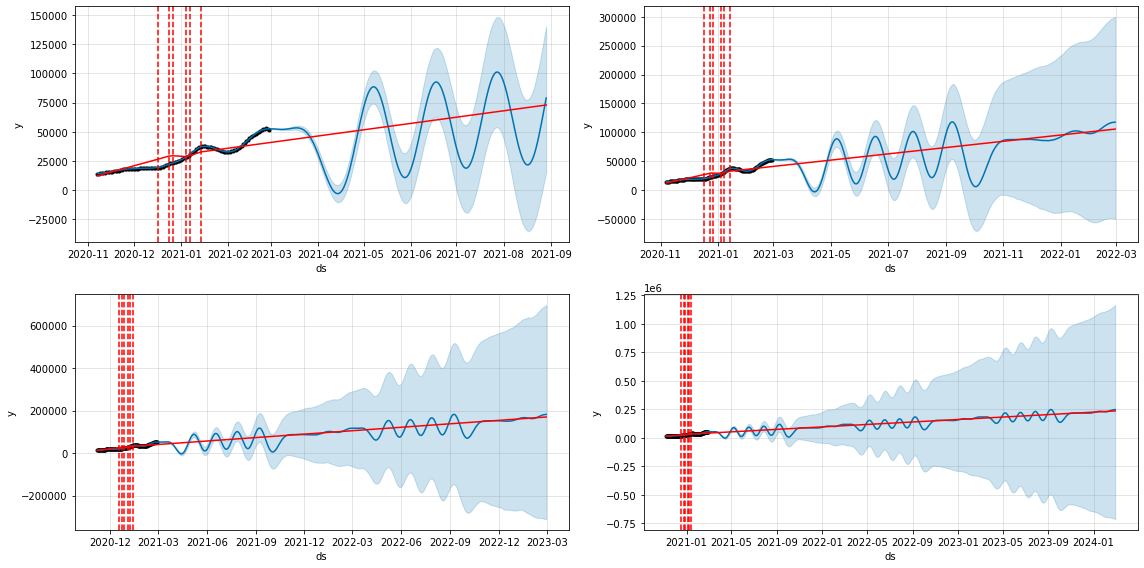

In [16]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.8)

draw_forecasts(get_forecasts(prophet, df3_after_biden))

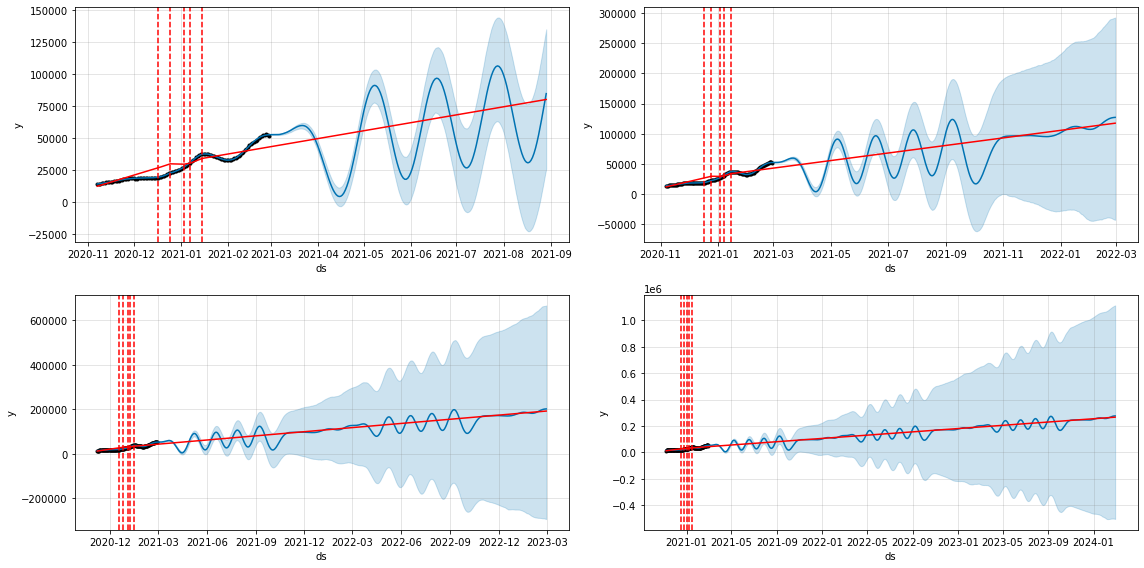

In [17]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  yearly_seasonality=True,
                 changepoint_range=0.9)

draw_forecasts(get_forecasts(prophet, df3_after_biden))